In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('train1.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [81]:
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [43]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [44]:
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

<AxesSubplot:>

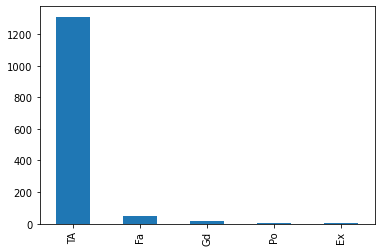

In [45]:
df['GarageQual'].value_counts().plot(kind='bar')

In [46]:
df['GarageQual'].mode()

0    TA
dtype: object

<AxesSubplot:ylabel='Density'>

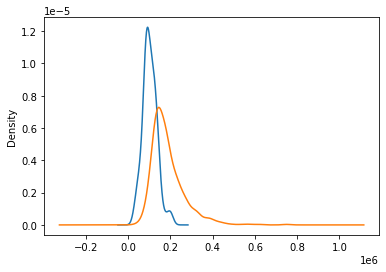

In [47]:
figure=plt.figure()
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde')

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde')

In [48]:
temp=df[df['GarageQual']=='TA']

In [49]:
df['GarageQual'].fillna('TA',inplace=True)

<AxesSubplot:>

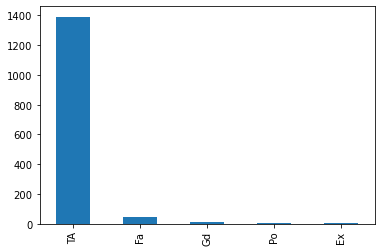

In [50]:
df['GarageQual'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Density'>

<Figure size 432x288 with 0 Axes>

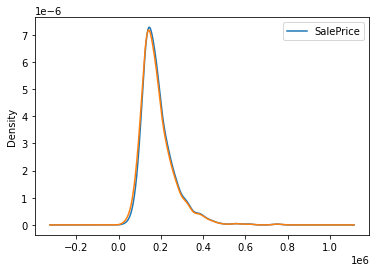

In [51]:
figure=plt.figure()
temp.plot(kind='kde')

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

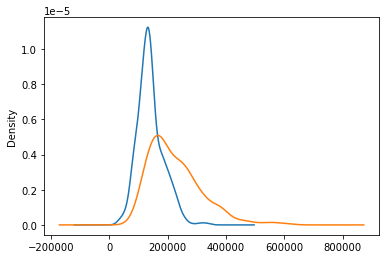

In [52]:
figure=plt.figure()
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde')

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde')

In [53]:
temp=df[df['FireplaceQu']=='Gd']

In [54]:
df['FireplaceQu'].fillna('Gd',inplace=True)

### Since the distirbution is still different after filling NA values , then we will not use frequen imputer for this column

<AxesSubplot:ylabel='Density'>

<Figure size 432x288 with 0 Axes>

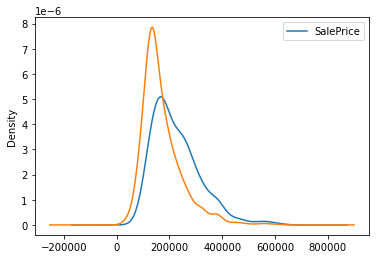

In [55]:
figure=plt.figure()
temp.plot(kind='kde')

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde')

## Implementing this using scikit learn

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [58]:
from sklearn.impute import SimpleImputer

In [61]:
imputer = SimpleImputer(strategy='most_frequent')

In [64]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [65]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

### Another tehnicque to replace missing values is to fill the NaN values with missing keyword and make a separate category so that the model knows the rows for these categories is missing 

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [68]:
from sklearn.impute import SimpleImputer

In [69]:
imputer = SimpleImputer(strategy='constant',fill_value='missing')

In [70]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [75]:
df=pd.DataFrame(X_train,columns=['lol1','lol2'])

In [76]:
df

,lol1,lol2
0,Gd,TA
1,Fa,TA
2,TA,TA
3,TA,TA
4,TA,TA
...,...,...
1163,Gd,TA
1164,TA,TA
1165,Gd,TA
1166,Gd,TA


In [78]:
df['lol1'].value_counts()

Gd    851
TA    259
Fa     23
Ex     20
Po     15
Name: lol1, dtype: int64